# Reinforcement Learning Introduction

Reinforcement learning is learning what to do to maximize a numerical
reward signal. The learner is not told which actions to take, but must
discover which actions yield the most reward by trying them.

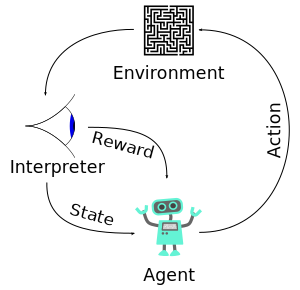

In [2]:
from IPython.core.display import SVG
SVG(filename='Reinforcement_learning_diagram.svg')

This is not supervised learning:
* No labeled data
* Examples of desired behaviour of all situations are difficult to find
* Agent must be able to learn from its own experience

This is not unsupervised learning:
* Not looking to find a hidden structure but to maximise a reward.

## Principles

### Agent

* Active participant on the enviroment.
* Seeks to achieve a given goal.

### Enviroment
* Place where the agent is active.
* Has a defined goal.
* Progress towards the goal can be shown.

### Policy 
* Mapping from the perceived states from the enviroment to the possible actions to advance to a new state.
* This is updated on an immediate reward signal which leads towards an end-goal.

### Reward and Value
* A reward is an immediate goal.
* A value function specifies what is good in the long run.
* The goal is the highest value not the highest reward.

### Enviroment Model
* This is something that mimics the vehaviour of the model.
* Models might be able to predict the next state and action based on the current values.

## Algorithms

### Monte-Carlo

Monte Carlo methods are ways of solving the reinforcement learning problem based on averaging sample returns.

In Monte Carlo we play an episode of the enviroment starting by some random state till the end, record the states, actions and rewards that we encountered then compute the the policy for each state we passed through. The final result can be averaged for multiple runs,

In Monte Carlo there is no guarantee that we will visit all the possible states, another weakness of this method is that we need to wait until the enviroment ends to be able to update our policy.

### Q-Learning

In Q-Learning we are looking for an action-value function $Q$ directly approximates $q_*$ which is the optimal action-value function:

$$
Q (S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma \underset{a}{max} Q(S_{t+1}, a) - Q(S_t, A_t) \right]
$$

### Deep Q-Learning

This is an extension of Q-Learning, that combines it with artificial
neural networks. Minh et al showed in \cite{minh_dqn} how a single
reinforcement learning agent can achieve high levels of performance in
many different problems without relying on different problem-specific
feature sets.

![SegmentLocal](atari_2.gif "segment")

Taken from: https://ai.googleblog.com/2020/03/introducing-dreamer-scalable.html

They also implemented some new techniques to further increase performance:

* Updating based more than a single event. Values are saved from multiple runs an then feed as a batch.
* By waiting until the multiple runs are done, prediction of the next state is not needed, this is closer to supervised learning:


$$
w_{t+1}=w_t+\alpha[R_{t+1}+\gamma \underset{a}{max} \tilde{q}(S_{t+1},a,w_t)-\hat{q}(S_t,A_t,w_t)]\nabla_{w_t}\hat{q}(S_t,A_t,w_t).
$$

* Error was clipped from $[-1, 1]$

### Actor Critic

The principal idea is to split the deep q-learning model in two:
* One for computing an action based on a state and
* another one to produce the $Q$ values of the action.

The actor takes as input the state and outputs the best action.
The critic, on the other hand, evaluates the action by
computing the value function.

## Frameworks

### KerasRL

* Deep Q Learning
* Double DQN
* Deep Determenistic Policy Gradient
* Continous DQN
* Cross-Entropy Method
* Dueling Network DQN
* Deep SARSA

### TensorForce

* Proximal Policy Optimization
* Trust-Region Policy Optimization
* Deterministic Policy Gradient
* Deep Q-Network
* Double DQN
* Dueling DQN
* Actor-Critic
* Advantage Actor-Critic

### Stable Baselines

* Advantage Actor Critic
* Actor Critic with Experience Replay
* Actor Critic using Kronecker Factored Trust Region
* Deep Determenistic Policy Gradient
* Deep Q Learning
* Generative Adversarial Imitation Learning
* Hindsight Experience Relay
* Proximal Policy Optimization
* Soft Actor Critic
* Twin Delayed DDPG
* Trust Region Policy Optimization

### TF Agents

* Deep Q Learning
* Double DQN
* Twin Delayed DDPG
* REINFORCE
* Proximal Policy Optimization
* Soft Actor Critic


## Challenges

### Batch Off-line and Off-Policy Training

Many systems cannot be trained on directly and need to learn from
fixed logs of the system’s behavior. Most times, we are deploying an
RL approach to replace a previous control system, and logs from that
policy are available.

### Learning On the Real System from Limited Samples

Actual systems do not have separate training and evaluation
environments. All training data comes from the actual system, and the
agent cannot have a separate exploration policy during training as its
exploratory actions do not come for free.

### Satisfying Safety Constrains

Almost all physical systems can destroy or degrade themselves and
their environment. Considering these systems’ safety is necessary for
controlling them. Safety is important during system operation, but
also during exploratory learning phases.

### Partial Observability and Non-Stationarity

Almost all real systems where we would want to deploy reinforcement
learning are partially observable. For example, on a physical system,
we likely do not have observations of the wear and tear on motors or
joints, or the amount of buildup in pipes or vents. 

### Unspecified and Multi-Objective Reward Functions

Reinforcement learning frames policy learning through the lens of
optimizing a global reward function, yet most systems have
multidimensional costs to be minimized. Most times, system or product
owners do not have a clear picture of what they want to optimize. 

### Explainability

In the event of policy errors, being able to understand the
error’s origins a posteriori is essential.

### Multi-task Learning

An agent should be able to perform many types
of tasks, rather than specializing in just one. The core of this
challenge is scalability. It should not take 1000 times as many
samples or hours of computation time to learn 1000 different tasks
than to learn one single task.

### Learning to Remember

An observation only captures a minor part
of the full environment state that determines the best action. In such
partially observable environments, an agent has to take into account
not just the current observation, but also past observations to
determine the best action.